## Recitation Week 2: Bias Variance Tradeoff + Ridge and Lasso regularization

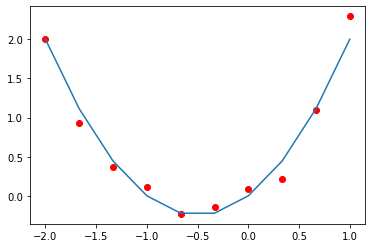

In [7]:

import numpy as np
import matplotlib.pyplot as plt 


xtrue = np.linspace(-2,1,10)

ttrue = xtrue+xtrue**2
tnoisy  = ttrue+ np.random.normal(0,0.1, len(xtrue))

xtest = np.linspace(-2,1,100)
ttest = xtrue + xtrue**2

plt.scatter(xtrue, tnoisy, c='r')
plt.plot(xtrue, ttrue)
plt.show()

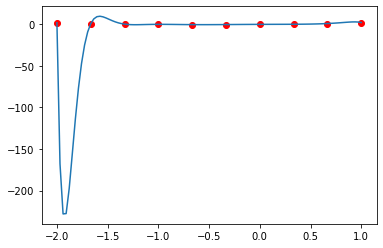

In [10]:
# step 1) generate polynomial features with PolynomialFeatures for several max degrees
# step 2) fit a regression model using LinearRegression
# apply our model on test data generated on the [-2,1]


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 20

poly = PolynomialFeatures(degree)
Xpoly = poly.fit_transform(xtrue.reshape(-1,1)) 
# matrix encoding the augmented features vectors 

reg = LinearRegression()
reg.fit(Xpoly, tnoisy)

Xtestpoly = poly.fit_transform(xtest.reshape(-1,1)) 

prediction = reg.predict(Xtestpoly)


plt.scatter(xtrue, tnoisy, c='r')
plt.plot(xtest, prediction)
plt.show()

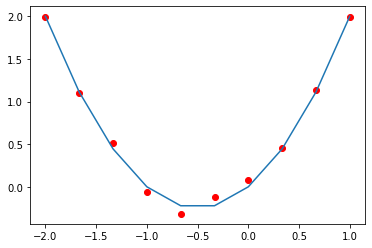

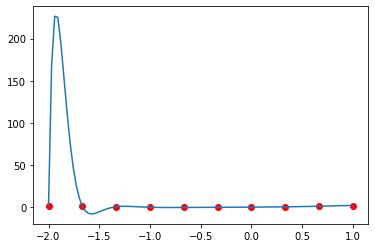

In [14]:
import numpy as np
import matplotlib.pyplot as plt 


xtrue = np.linspace(-2,1,10)

t = xtrue+xtrue**2
tnoisy  = t+ np.random.normal(0,0.1, len(xtrue))

xtest = np.linspace(-2,1,100)
ttest = xtrue + xtrue**2

plt.scatter(xtrue, tnoisy, c='r')
plt.plot(xtrue, t)
plt.show()


# step 1) generate polynomial features with PolynomialFeatures for several max degrees
# step 2) fit a regression model using LinearRegression
# apply our model on test data generated on the [-2,1]


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 20

poly = PolynomialFeatures(degree)
Xpoly = poly.fit_transform(xtrue.reshape(-1,1)) 
# matrix encoding the augmented features vectors 

reg = LinearRegression()
reg.fit(Xpoly, tnoisy)

Xtestpoly = poly.fit_transform(xtest.reshape(-1,1)) 

prediction = reg.predict(Xtestpoly)


plt.scatter(xtrue, tnoisy, c='r')
plt.plot(xtest, prediction)
plt.show()



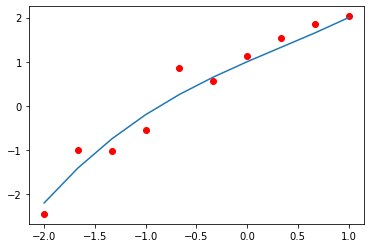

In [15]:
# demo bias variance 

x = np.linspace(-2,1,10)

ttrue = 0.1 * x**3 - 0.1* x**2 + x +1

tnoisy = ttrue+ np.random.normal(0,.25, len(x))

plt.scatter(x, tnoisy, c='r')
plt.plot(x, ttrue)
plt.show()



### Low Bias, High variance ((almost) no regularization)

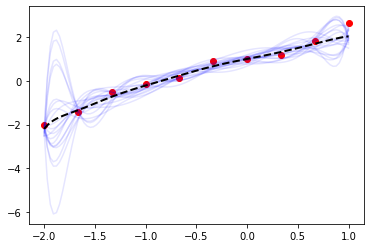

In [22]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')


numXp = 20

degree = 10

xtest = np.linspace(-2,1,100)
from sklearn.linear_model import LinearRegression



plt.scatter(x, tnoisy, c='r')

predictionMat = np.zeros((len(xtest), numXp))

for xp in np.arange(numXp):
    
    # generate the subsets D^i 
    tnoisy = ttrue+ np.random.normal(0,.25, len(x))
    
    poly = PolynomialFeatures(degree)
    Xpoly = poly.fit_transform(x.reshape(-1,1)) 
    reg = Ridge(alpha=1e-4,tol=1e-2)
    reg.fit(Xpoly, tnoisy)
    
    # represent the model 
    XpolyTest = poly.fit_transform(xtest.reshape(-1,1))
    prediction = reg.predict(XpolyTest)
    predictionMat[:,xp] = prediction
    
    
    
    plt.plot(xtest, prediction, alpha=.1, c='b')
    
familyAverage = np.mean(predictionMat, axis=1)

plt.plot(xtest, familyAverage, '--',linewidth=2, c='black')
    
plt.show()

### Low Variance, high bias (heavy regularization)

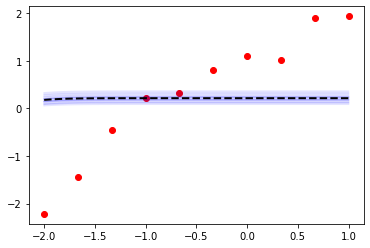

In [23]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')


numXp = 20

degree = 10

xtest = np.linspace(-2,1,100)
from sklearn.linear_model import LinearRegression



plt.scatter(x, tnoisy, c='r')

predictionMat = np.zeros((len(xtest), numXp))

for xp in np.arange(numXp):
    
    # generate the subsets D^i 
    tnoisy = ttrue+ np.random.normal(0,.25, len(x))
    
    poly = PolynomialFeatures(degree)
    Xpoly = poly.fit_transform(x.reshape(-1,1)) 
    reg = Ridge(alpha=1e8,tol=1e-2)
    reg.fit(Xpoly, tnoisy)
    
    # represent the model 
    XpolyTest = poly.fit_transform(xtest.reshape(-1,1))
    prediction = reg.predict(XpolyTest)
    predictionMat[:,xp] = prediction
    
    
    
    plt.plot(xtest, prediction, alpha=.1, c='b')
    
familyAverage = np.mean(predictionMat, axis=1)

plt.plot(xtest, familyAverage, '--',linewidth=2, c='black')
    
plt.show()

### Evolution of the MSE, Bias and Variance as a function of the model complexity

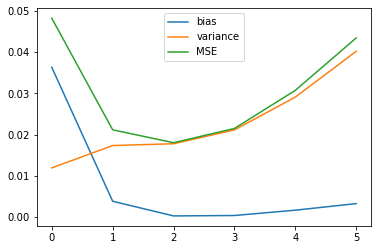

In [24]:
numXp = 20

maxDegree = 7

xtest = np.linspace(-2,1,100) 

ttest = 0.1 * xtest**3 - 0.1* xtest**2 + xtest +1



bias_squared = np.zeros((maxDegree, 1))
variance = np.zeros((maxDegree, 1))
MSE = np.zeros((maxDegree, 1))

for degree in np.arange(maxDegree):
    
    predictionMat = np.zeros((len(xtest), numXp))

    poly = PolynomialFeatures(degree)
    
    for xp in np.arange(numXp):
    
        # generate the subsets D^i 
        tnoisy = ttrue+ np.random.normal(0,.25, len(x))
        
        Xpoly = poly.fit_transform(x.reshape(-1,1)) 
        reg = LinearRegression()
        reg.fit(Xpoly, tnoisy)
    
        # represent the model 
        XpolyTest = poly.fit_transform(xtest.reshape(-1,1))
        prediction = reg.predict(XpolyTest)
        predictionMat[:,xp] = prediction
    
    
    familyAverage = np.mean(predictionMat, axis=1)
    bias_vec = (ttest.reshape(-1,1) - familyAverage.reshape(-1,1))**2
    
    
    ones_vec = np.ones((1, numXp))
    tmp = (predictionMat - np.matmul(familyAverage.reshape(-1,1), ones_vec))**2 
    variance_vec = np.mean(tmp,axis=1)
    
    bias_squared[degree] = np.mean(bias_vec)
    variance[degree] = np.mean(variance_vec)
    
    MSE[degree] = bias_squared[degree] + variance[degree]
    
plt.plot(bias_squared[1:], label='bias')
plt.plot(variance[1:], label = 'variance')
plt.plot(MSE[1:], label = 'MSE')
plt.legend()

plt.show()